In [92]:
# from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [107]:
# columns = "a1 a2 a3 observe_num gluctose_area insuline_area SSPG relative_weight fasting_plasma_glucose class_name"#.split()
columns = "a1 a2 a3 ob_num glu_a ins_a SSPG rel_w fast_gluc c_name"#.split()
diabetes = pd.read_csv('diabetes.csv', delim_whitespace=True , names=columns.split()) 


# Disregard the first three columns
del diabetes['a1']
del diabetes['a2']
del diabetes['a3']

# delete observation number
del diabetes['ob_num']
print(diabetes.head())
print(type(diabetes))

   glu_a  ins_a  SSPG  rel_w  fast_gluc  c_name
0   0.81     80   356    124         55       3
1   0.95     97   289    117         76       3
2   0.94    105   319    143        105       3
3   1.04     90   356    199        108       3
4   1.00     90   323    240        143       3
<class 'pandas.core.frame.DataFrame'>


In [80]:
# Find unique variables for class_name
unique_set = set(diabetes['c_name'])
print(unique_set)


# test_set = set(diabetes['class_name'])

{1, 2, 3}


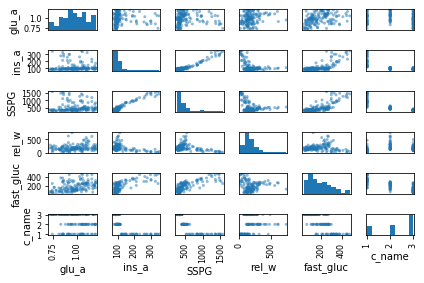

In [83]:
# plot scatterpltot

axes = pd.plotting.scatter_matrix(diabetes, alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_plot.png')

In [93]:
# Split data train,set


train_set = diabetes.sample(frac=0.8, random_state=0)
test_set = diabetes.drop(train_set.index) 

train_set_labels = train_set.pop('c_name')
test_set_labels = test_set.pop('c_name')

# print(train_set)
# print(train_set_labels)
# print(test_set)
# print(test_set_labels)

In [151]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(train_set, train_set_labels)
pred=lda_model.predict(test_set)

In [152]:
# print("priors_ : ", model.priors_)
# print("\nmeans_ : \n", model.means_)
# print("\ncoef_ : \n" , model.coef_)
# print(np.unique(pred, return_counts=True))
# print(confusion_matrix(pred, test_set_labels))
# print(classification_report(test_set_labels, pred, digits=3))

In [155]:
# Apply QDA

qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(train_set, train_set_labels)
pred2=qda_model.predict(test_set)

In [154]:

# print(model2.priors_)
# print(model2.means_)
# print(np.unique(pred2, return_counts=True))
# print(confusion_matrix(pred2, test_set_labels))
# print(classification_report(test_set_labels, pred2, digits=3))


In [156]:
# Create individual tester
individual_tester = np.array([0.98, 122, 544, 186, 184])
individual_tester_df = pd.DataFrame({"ob_num": 999 ,"glu_a": 0.98,"ins_a":122 ,"SSPG":544 ,"rel_w":186 ,"fast_gluc":184 }, index = [0])

del individual_tester_df["ob_num"]
print(individual_tester_df) 

   glu_a  ins_a  SSPG  rel_w  fast_gluc
0   0.98    122   544    186        184


___Toss individual_tester_df into prediction model, find LDA and QDA's class result___

In [157]:
# QDA 

individual_QDA_prediction =qda_model.predict(individual_tester_df)
print(individual_QDA_prediction) 

[1]


In [158]:
# LDA Results

individual_LDA_prediction=model.predict(individual_tester_df)
print(individual_LDA_prediction)

[3]
